--- Resultados del Perceptrón de Scikit-learn ---
Precisión en el conjunto de prueba: 0.9778
Bias final (Intercepto): 45.00000
Pesos finales (Coeficientes): [1.0101881  9.02621613]


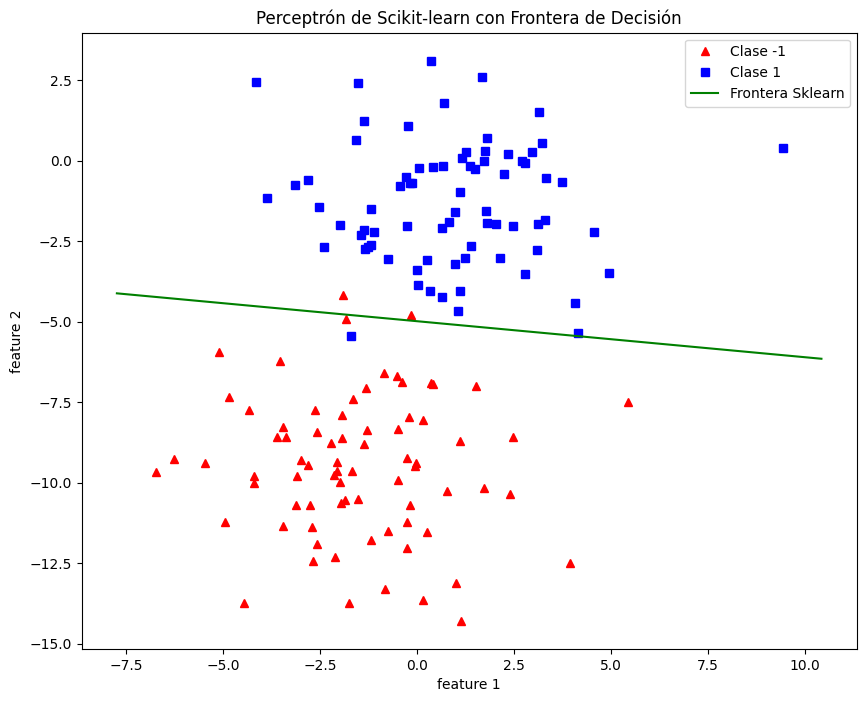

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos linealmente separables
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=2.05,
    random_state=2
)

# Ajustar las etiquetas a -1 y 1 (convención de tu código)
y_adjusted = np.where(y == 0, -1, 1)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_adjusted, test_size=0.3, random_state=42
)

# --- 1. Inicializar el Perceptrón de Scikit-learn ---
# eta0 es la tasa de aprendizaje (lr), max_iter es el número de épocas.
# tol=None asegura que se completen las 200 iteraciones (max_iter).
modelo_sklearn = Perceptron(
    eta0=0.5,
    max_iter=200,
    random_state=42,
    tol=None 
)

# --- 2. Entrenar el modelo ---
# El método 'fit' hace todo el cálculo de pesos y bias automáticamente.
modelo_sklearn.fit(X_train, y_train)

# --- 3. Evaluación y Resultados ---
y_pred = modelo_sklearn.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print("--- Resultados del Perceptrón de Scikit-learn ---")
print(f"Precisión en el conjunto de prueba: {precision:.4f}")
print(f"Bias final (Intercepto): {modelo_sklearn.intercept_[0]:.5f}")
print(f"Pesos finales (Coeficientes): {modelo_sklearn.coef_[0]}")
def plot_decision_boundary_sklearn(X, y, model):
    """Grafica la frontera de decisión usando los parámetros de Scikit-learn."""
    w1, w2 = model.coef_[0]
    b = model.intercept_[0]
    
    # x2 = (-b - w1*x1) / w2
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1 = np.array([x1_min, x1_max])
    x2 = (-b - w1 * x1) / w2

    # Plotting
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "r^", label="Clase -1")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Clase 1")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptrón de Scikit-learn con Frontera de Decisión")
    plt.plot(x1, x2, 'g-', label="Frontera Sklearn") # Línea de decisión verde
    plt.legend()
    plt.show()

plot_decision_boundary_sklearn(X, y_adjusted, modelo_sklearn)

In [10]:
# Asegúrate de que el modelo_sklearn haya sido entrenado (fit) previamente
# El entrenamiento se realizó con X_train y y_train

print("--- Parámetros Finales del Perceptrón (Scikit-learn) ---")

# Bias (Intercepto)
bias_sklearn = modelo_sklearn.intercept_[0]
print(f"Bias final (Intercepto): {bias_sklearn:.5f}")

# Pesos (W)
pesos_sklearn = modelo_sklearn.coef_[0]
print(f"Pesos finales (W1, W2): {pesos_sklearn}")
print(f"  > Peso W1 (Feature 1): {pesos_sklearn[0]:.5f}")
print(f"  > Peso W2 (Feature 2): {pesos_sklearn[1]:.5f}")

--- Parámetros Finales del Perceptrón (Scikit-learn) ---
Bias final (Intercepto): 45.00000
Pesos finales (W1, W2): [1.0101881  9.02621613]
  > Peso W1 (Feature 1): 1.01019
  > Peso W2 (Feature 2): 9.02622


--- Parámetros Finales (SGDClassifier / Perceptrón) ---
Bias final (Intercepto): 39.50000
Pesos finales (W1, W2): [4.8096933  8.85278835]
Costo final (Errores en Época 200): 1


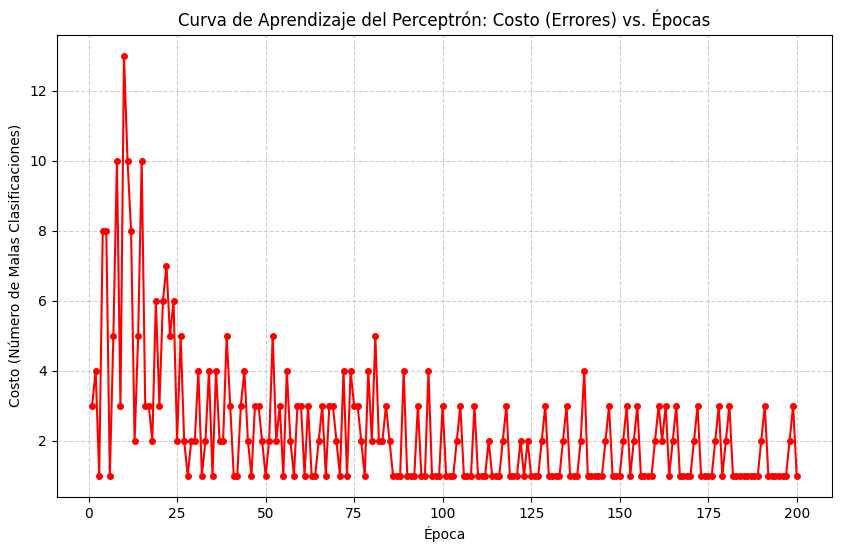

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. PREPARACIÓN DE DATOS

# Generar datos linealmente separables
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=2.05,
    random_state=2
)

# Ajustar las etiquetas a -1 y 1 (convención del Perceptrón)
y_adjusted = np.where(y == 0, -1, 1)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_adjusted, test_size=0.3, random_state=42
)


# 2. ENTRENAMIENTO ITERATIVO Y REGISTRO DEL COSTO

# Inicializar el modelo SGD como un Perceptrón
# loss='perceptron' lo convierte en un clasificador Perceptrón
modelo_sgd = SGDClassifier(
    loss='perceptron',
    eta0=0.5,
    learning_rate='constant',
    random_state=42,
)

n_epochs = 200
costo_historial = []

# Entrenamiento Iterativo para Registrar el Costo (número de errores)
for i in range(n_epochs):
    # Entrenar el modelo con una sola época (partial_fit)
    # Se debe pasar 'classes' en la primera iteración
    if i == 0:
        modelo_sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
    else:
        modelo_sgd.partial_fit(X_train, y_train)

    # Calcular la predicción y el COSTO (número de errores)
    y_train_pred = modelo_sgd.predict(X_train)
    errores = np.sum(y_train != y_train_pred)
    costo_historial.append(errores)
 
# 3. REPORTE DE RESULTADOS
print("--- Parámetros Finales (SGDClassifier / Perceptrón) ---")
print(f"Bias final (Intercepto): {modelo_sgd.intercept_[0]:.5f}")
print(f"Pesos finales (W1, W2): {modelo_sgd.coef_[0]}")
print(f"Costo final (Errores en Época {n_epochs}): {costo_historial[-1]}")

# 4. GRAFICAR LA CURVA DE COSTO
epochs_list = range(1, len(costo_historial) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_list, costo_historial, color='red', marker='o', markersize=4, linestyle='-')

plt.title("Curva de Aprendizaje del Perceptrón: Costo (Errores) vs. Épocas")
plt.xlabel("Época")
plt.ylabel("Costo (Número de Malas Clasificaciones)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

la curva exhibe un descenso inicial rápido del número de errores (costo), lo que demuestra que los pesos y el bias se están ajustando eficientemente. Luego, la curva se estabiliza en un valor constante (que no es cero), indicando que los datos no son perfectamente separables linealmente y que el algoritmo ha encontrado la mejor frontera de decisión posible, dejando un mínimo de errores que no puede corregir.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- (Preparación de Datos, si no está en memoria) ---
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=2.05, random_state=2)
y_adjusted = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.3, random_state=42)

# --- Entrenamiento Iterativo para Registrar la Precisión ---
modelo_sgd = SGDClassifier(
    loss='perceptron',
    eta0=0.5,
    learning_rate='constant',
    random_state=42,
)

n_epochs = 200
accuracy_historial = []

for i in range(n_epochs):
    # Entrenar el modelo con una sola época
    if i == 0:
        modelo_sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
    else:
        modelo_sgd.partial_fit(X_train, y_train)

    # Calcular la precisión (accuracy) en el conjunto de entrenamiento
    y_train_pred = modelo_sgd.predict(X_train)
    precision = accuracy_score(y_train, y_train_pred)
    accuracy_historial.append(precision)

# --- Reporte de Precisión Final ---
print(f"Precisión Final del Modelo (Época {n_epochs}): {accuracy_historial[-1]:.4f}")

Precisión Final del Modelo (Época 200): 0.9905


--- Parámetros Finales (SGDClassifier / Perceptrón) ---
Bias final (Intercepto): 39.50000
Pesos finales (W1, W2): [4.8096933  8.85278835]
Precisión Final en entrenamiento (Época 200): 0.9905


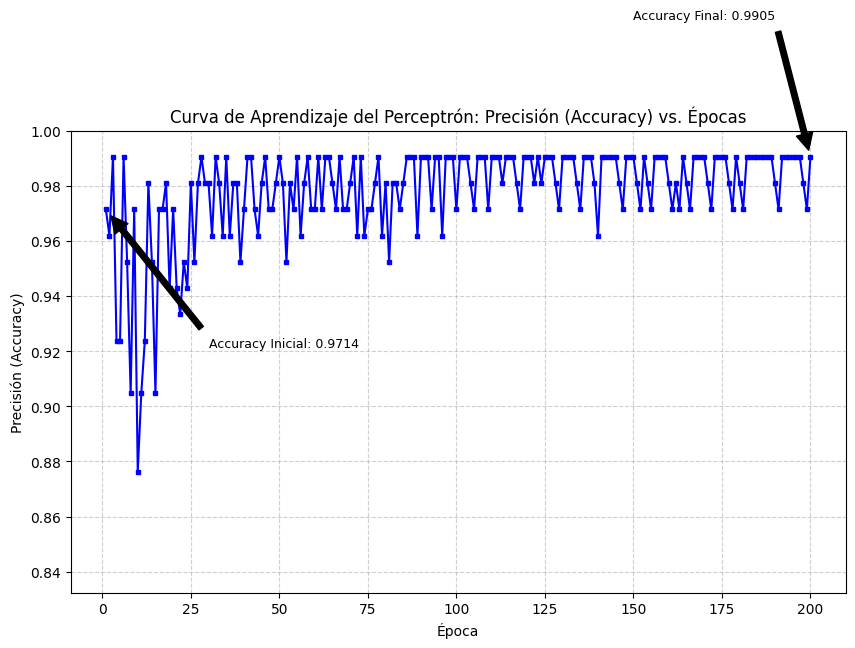

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 1. PREPARACIÓN DE DATOS (si no está en memoria)

X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=2.05, random_state=2)
y_adjusted = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.3, random_state=42)

# 2. ENTRENAMIENTO ITERATIVO Y REGISTRO DE LA PRECISIÓN (ACCURACY)
modelo_sgd = SGDClassifier(
    loss='perceptron',
    eta0=0.5,
    learning_rate='constant',
    random_state=42,
)

n_epochs = 200
accuracy_historial = [] # Lista para almacenar el accuracy en cada época

for i in range(n_epochs):
    # Entrenar el modelo con una sola época (partial_fit)
    if i == 0:
        modelo_sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
    else:
        modelo_sgd.partial_fit(X_train, y_train)

    # Calcular la precisión (accuracy) en el conjunto de entrenamiento
    y_train_pred = modelo_sgd.predict(X_train)
    precision = accuracy_score(y_train, y_train_pred)
    accuracy_historial.append(precision)


# 3. REPORTE DE RESULTADOS Y PRECISIÓN FINAL
print("--- Parámetros Finales (SGDClassifier / Perceptrón) ---")
print(f"Bias final (Intercepto): {modelo_sgd.intercept_[0]:.5f}")
print(f"Pesos finales (W1, W2): {modelo_sgd.coef_[0]}")
print(f"Precisión Final en entrenamiento (Época {n_epochs}): {accuracy_historial[-1]:.4f}")

# 4. GRAFICAR LA CURVA DE PRECISIÓN (ACCURACY)
epochs_list = range(1, len(accuracy_historial) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_list, accuracy_historial, color='blue', marker='s', markersize=3, linestyle='-')

plt.title("Curva de Aprendizaje del Perceptrón: Precisión (Accuracy) vs. Épocas")
plt.xlabel("Época")
plt.ylabel("Precisión (Accuracy)")
plt.grid(True, linestyle='--', alpha=0.6)
# Ajustar el límite inferior del eje Y para una mejor visualización de la convergencia
plt.ylim(min(accuracy_historial) * 0.95, 1.0) 

# Anotaciones para el inicio y el final de la curva
plt.annotate(
    f'Accuracy Inicial: {accuracy_historial[0]:.4f}',
    xy=(1, accuracy_historial[0]),
    xytext=(30, accuracy_historial[0] - 0.05),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=9
)
plt.annotate(
    f'Accuracy Final: {accuracy_historial[-1]:.4f}',
    xy=(epochs_list[-1], accuracy_historial[-1]),
    xytext=(epochs_list[-1] - 50, accuracy_historial[-1] + 0.05),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=9
)

plt.show()

la gráfica de Accuracy vs. Épocas visualiza directamente la curva de aprendizaje del modelo, demostrando cómo mejora su rendimiento a lo largo del tiempo de entrenamiento hasta que alcanza un punto de máxima efectividad.

✅ Reporte de Métricas de Clasificación
1. Accuracy (Precisión Global): 0.9778
2. Sensibilidad (Recall - Clase 1): 1.0000
3. Especificidad (Clase -1): 0.9444
4. F1-Score: 0.9818


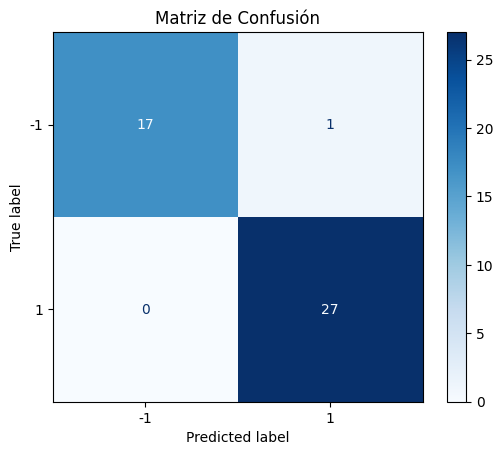

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay

# 1. CÁLCULO DE MÉTRICAS (Usando solo y_test y y_pred) 

# a) Matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)

# b) Accuracy (Precisión Global)
accuracy = accuracy_score(y_test, y_pred)

# c) Sensibilidad (Recall)
# Usamos pos_label=1 para enfocarnos en la clase 'Positiva' (1)
sensitivity_recall = recall_score(y_test, y_pred, pos_label=1)

# d) F1-Score
f1 = f1_score(y_test, y_pred, pos_label=1)

# e) Especificidad (Cálculo manual)
# Extracción de valores de la matriz:
# Fila 0: Real -1 (Negativo) -> [VN, FP]
# Fila 1: Real 1 (Positivo) -> [FN, VP]
VN = matriz[0, 0]
FP = matriz[0, 1]
# Fórmula de Especificidad: VN / (VN + FP)
specificity = VN / (VN + FP) if (VN + FP) > 0 else 0


# 2. REPORTE Y VISUALIZACIÓN 
print("Reporte de Métricas de Clasificación")
print(f"1. Accuracy (Precisión Global): {accuracy:.4f}")
print(f"2. Sensibilidad (Recall - Clase 1): {sensitivity_recall:.4f}")
print(f"3. Especificidad (Clase -1): {specificity:.4f}")
print(f"4. F1-Score: {f1:.4f}")

# 3. GRAFICAR MATRIZ DE CONFUSIÓN (Requiere las clases para las etiquetas)
# Nota: La matriz de confusión requiere las etiquetas de clase. Las clases son [-1, 1].
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=[-1, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# 1. PREPARACIÓN DE DATOS (Necesario para el entrenamiento)

# Generar datos que ya usaste
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=2.05, random_state=2)
y_adjusted = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.3, random_state=42)

# 2. INICIALIZACIÓN Y ENTRENAMIENTO DEL MODELO (SGDClassifier)

# Definir e inicializar la variable modelo_final
modelo_final = SGDClassifier(
    loss='perceptron',
    eta0=0.5,
    learning_rate='constant',
    random_state=42,
)

# Entrenar el modelo con los datos de entrenamiento

print("Entrenando modelo_final...")
modelo_final.fit(X_train, y_train)
print("¡Entrenamiento completado!")


# 3. SIMULACIÓN DE LA MUESTRA NUEVA

# Muestra 1: Valores altos (Esperado Clase 1 / Positivo)
X_nuevo_1 = np.array([
    [1.0, 1.0]
])

# Muestra 2: Valores bajos (Esperado Clase -1 / Negativo)
X_nuevo_2 = np.array([
    [-5.0, -10.0]
])

# Concatenar para predecir ambas a la vez
X_nuevos = np.vstack([X_nuevo_1, X_nuevo_2])


# 4. CLASIFICACIÓN CON EL ALGORITMO ENTRENADO


# Realizar la predicción
predicciones = modelo_final.predict(X_nuevos)


# 5. REPORTE DE RESULTADOS

print("  Clasificación de Pacientes Nuevos")
print(f"Paciente 1 (Características: {X_nuevo_1[0]}): Clase {predicciones[0]}")
print(f"Paciente 2 (Características: {X_nuevo_2[0]}): Clase {predicciones[1]}")


Entrenando modelo_final...
¡Entrenamiento completado!

  💉 Clasificación de Pacientes Nuevos
Paciente 1 (Características: [1. 1.]): Clase 1
Paciente 2 (Características: [ -5. -10.]): Clase -1
